In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Date Alignment


In [2]:
df_trans = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\transformed_raw.csv')
df_apple = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\AAPL_historical_data.csv')
# df_amzn = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\AMZN_historical_data.csv')


df_apple['Date'] = pd.to_datetime(df_apple['Date'], format='ISO8601')
df_trans['Date'] = pd.to_datetime(df_trans['date'], format='ISO8601').dt.normalize()
# df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], format='ISO8601')


df_trans['Date'] = df_trans['Date'].dt.tz_convert(None)
df_trans.drop('date', axis=1)

# print(df_trans.dtypes)
# print(df_apple.dtypes)

df_trans_apple = df_trans[df_trans['stock']=="A"]
df_apple= df_apple[(df_apple['Date'] >= df_trans['Date'].min()) & (df_apple['Date'] <= df_trans['Date'].max()) ]
# df_amzn = df_amzn[(df_amzn['Date'] >= df_trans['Date'].min()) & (df_amzn['Date'] <= df_trans['Date'].max())]


print(df_trans_apple['Date'].min(), df_trans_apple['Date'].max())
print(df_apple['Date'].min(), df_apple['Date'].max())
# print(df_amzn['Date'].min(), df_apple['Date'].max())



2009-04-29 04:00:00 2020-06-05 04:00:00
2009-02-17 00:00:00 2020-06-11 00:00:00
2009-02-17 00:00:00 2020-06-11 00:00:00


In [3]:
df_merged = pd.merge(df_trans_apple, df_apple, on='Date', how='outer')


In [4]:
df_merged.isna().sum()

Unnamed: 0         2850
headline           2850
url                2850
publisher          2850
date               2850
stock              2850
datetime           2850
sentiment_score    2850
sentiment          2850
tokens             2850
topic              2850
Date                  0
Open               1433
High               1433
Low                1433
Close              1433
Adj Close          1433
Volume             1433
Dividends          1433
Stock Splits       1433
dtype: int64

In [5]:



# str_cols = df_merged.select_dtypes(include=['object']).columns
# int_cols = df_merged.select_dtypes(include=['float64']).columns

df_merged['topic']= df_merged['topic'].fillna(df_merged['topic'].mean())
df_merged['High']= df_merged['High'].fillna(df_merged['High'].mean())
df_merged['Low']= df_merged['Low'].fillna(df_merged['Low'].mean())
df_merged['Close']= df_merged['Close'].fillna(df_merged['Close'].mean())
df_merged['Open']= df_merged['Open'].fillna(df_merged['Open'].mean())
df_merged['Adj Close']= df_merged['Adj Close'].fillna(df_merged['Adj Close'].mean())
df_merged['Volume']= df_merged['Volume'].fillna(df_merged['Volume'].mean())
df_merged['Dividends']= df_merged['Dividends'].fillna(df_merged['Dividends'].mean())
df_merged['Stock Splits']= df_merged['Stock Splits'].fillna(df_merged['Stock Splits'].mean())
df_merged['sentiment_score']= df_merged['sentiment_score'].fillna(df_merged['sentiment_score'].mean())




In [6]:
df_merged.drop(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'datetime', 'sentiment', 'tokens'], axis=1, inplace=True)


In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4283 entries, 0 to 4282
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sentiment_score  4283 non-null   float64       
 1   topic            4283 non-null   float64       
 2   Date             4283 non-null   datetime64[ns]
 3   Open             4283 non-null   float64       
 4   High             4283 non-null   float64       
 5   Low              4283 non-null   float64       
 6   Close            4283 non-null   float64       
 7   Adj Close        4283 non-null   float64       
 8   Volume           4283 non-null   float64       
 9   Dividends        4283 non-null   float64       
 10  Stock Splits     4283 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 368.2 KB


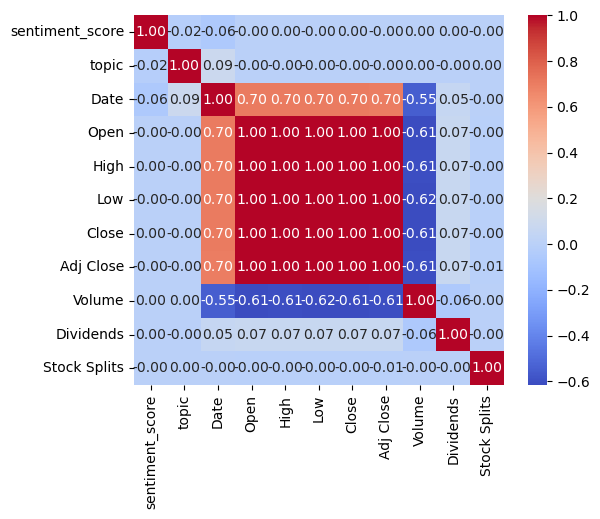

In [8]:
corr_matrix = df_merged.corr()
sns.heatmap(corr_matrix,annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.show()


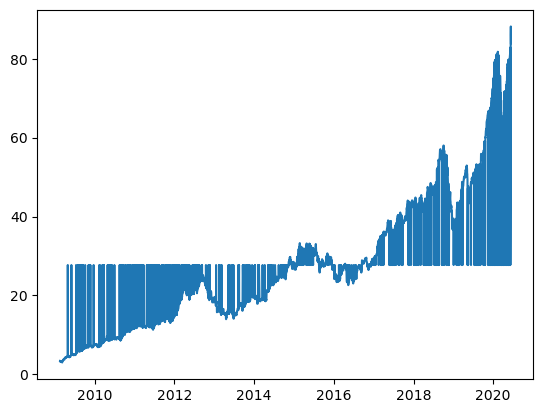

In [22]:
plt.plot(df_merged['Date'], df_merged['Close'])
# plt.plot(df_merged['Date'], df_merged['sentiment_score'], color= 'red')
plt.show()

In [23]:
# Ensure the DataFrame is sorted by Date
# df_merged = df_merged.sort_values('Date')

# Calculate daily percentage change in the 'Close' column
df_merged['Daily Return'] = df_merged['Close'].pct_change()

# Drop the first row (NaN due to no previous day)
df_grouped = df_merged.dropna(subset=['Daily Return'])
# df_grouped = df_grouped.dropna()

df_grouped = df_merged[['Date','sentiment_score', 'Close', 'Daily Return']]

# print(df_merged[['Date', 'Close', 'Daily Return']].head())


In [25]:
df_merged.isna().sum()

sentiment_score    0
topic              0
Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Dividends          0
Stock Splits       0
Daily Return       1
dtype: int64

In [26]:
df_grouped.isna().sum()

Date               0
sentiment_score    0
Close              0
Daily Return       1
dtype: int64

In [19]:
correlation = df_grouped[['sentiment_score', 'Daily Return']].corr()
correlation

,sentiment_score,Daily Return
sentiment_score,1.000000,0.002643
Daily Return,0.002643,1.000000


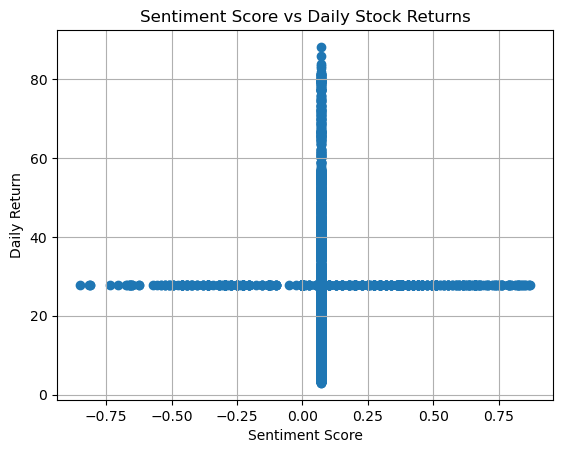

In [28]:
plt.scatter(df_grouped['sentiment_score'], df_grouped['Close'])
plt.title('Sentiment Score vs Daily Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()